# Demo 10 : Decision 🌳s 

This demo borrows from https://github.com/fastai/fastai/blob/master/courses/ml1/lesson3-rf_foundations.ipynb

You will implement:
- training a decision tree
- training a random forest


In [4]:
# Verify that sklearn is properly installed by running this cell
import sklearn

In [17]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Prepare the data

We will use the Iris dataset again. Start by loading the data and splitting it into train/test sets.

In [1]:
from sklearn import datasets

iris = datasets.load_iris()
digits = datasets.load_digits()

In [10]:
# Split into train/test
from sklearn.model_selection import train_test_split

(iris_train_x, iris_test_x, 
 iris_train_y, iris_test_y) = train_test_split(iris.data, iris.target, test_size=100)

print(iris_train_x.shape, iris_train_y.shape)
print(iris_test_x.shape, iris_test_y.shape)

(50, 4) (50,)
(100, 4) (100,)


# Models

## Decision tree

First, we will implement the basic decision tree.

We can now use the sklearn functions to implement a nearest neighbor classifier.

## Random forest

Next, we will implement the random forest model using our decision tree. 

A random forest is an ensemble of decision trees, where each tree is trained by randomizing the dataset set in some way.

We will explore two methods for randomizing the dataset: picking a random subset of rows (bagging), and picking a random subset of features.

In [15]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(iris_train_x, iris_train_y)
print(knn.predict(iris_test_x))
print(iris_test_y)
print(iris_test_y != knn.predict(iris_test_x))

[0 0 1 0 1 0 2 0 0 1 2 0 0 1 2 0 1 0 0 0 0 0 0 0 2 2 0 1 1 1 1 0 1 2 1 1 2
 2 0 1 0 2 2 2 1 2 1 2 0 2 1 0 2 1 0 2 0 1 2 1 1 0 1 2 1 1 0 2 1 2 0 0 1 0
 0 2 1 2 0 1 1 1 2 2 0 2 2 2 2 2 1 0 2 0 2 0 2 2 2 1]
[0 0 1 0 1 0 2 0 0 1 2 0 0 1 2 0 1 0 0 0 0 0 0 0 2 1 0 1 1 1 1 0 1 2 1 1 2
 2 0 1 0 2 2 2 1 2 1 2 0 2 1 0 2 1 0 2 0 1 2 1 1 0 1 2 1 1 0 2 1 2 0 0 1 0
 0 2 1 2 0 2 1 1 2 2 0 2 2 2 2 2 1 0 2 0 1 0 2 2 2 1]
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False  True False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False  True False False False False
 False False False False False False False False False False  True False
 False F

Maintenant, faire varier le k des k-plus proches voisins, puis afficher la performance en fonction de k

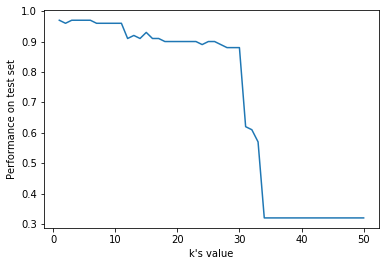

In [19]:
k_values = np.arange(1, 51)
k_perf = []

#TODO plot the validation curve for different k
for k in k_values:  # question
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(iris_train_x, iris_train_y)
    test_pred = knn.predict(iris_test_x)
    k_perf.append((test_pred == iris_test_y).mean())

plt.xlabel('k\'s value')
plt.ylabel('Performance on test set')
plt.plot(k_values, k_perf)

## Digits Dataset

We can now use the same classifier for another dataset: digits images.

In [0]:
np.random.seed(0)
indices = np.random.permutation(len(digits.target))

# Separate into train/test as usual
digits_train_x = digits.data[indices[:1500]]
digits_test_x = digits.data[indices[1500:]]
digits_train_y = digits.target[indices[:1500]]
digits_test_y = digits.target[indices[1500:]]

print(digits_train_x.shape, digits_train_y.shape)

(1500, 64) (1500,)


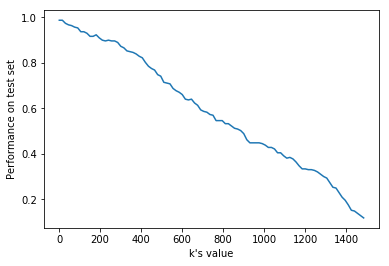

In [0]:
#TODO another validation curve

# We will vary k using jumps of 15
k_values = np.arange(1, 1500, 15)
k_perf = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(digits_train_x, digits_train_y)
    test_pred = knn.predict(digits_test_x)
    k_perf.append((test_pred == digits_test_y).mean())

plt.xlabel('k\'s value')
plt.ylabel('Performance on test set')
plt.plot(k_values, k_perf)